# 11b: Bayesian Neural Networks



## Bayesian Neural Networks

Bayesian neural networks differ from plain neural networks in that their weights are assigned a probability distribution instead of a single value or point estimate. These probability distributions describe the uncertainty in weights and can be used to estimate uncertainty in predictions. Training a Bayesian neural network via variational inference learns the parameters of these distributions instead of the weights directly.

A Bayesian neural network is a probabilistic model that allows us to estimate uncertainty in predictions by representing the weights and biases of the network as probability distributions rather than fixed values. This allows us to *incorporate prior knowledge* about the weights and biases into the model, and *update our beliefs* about them as we observe data.

Mathematically, a Bayesian neural network can be represented as follows:

Given a set of input data $x$, we want to predict the corresponding output $y$. The neural network represents this relationship as a function $f(x, \theta)$, where $\theta$ are the weights and biases of the network. In a Bayesian neural network, we represent the weights and biases as probability distributions, so $f(x, \theta)$ becomes a probability distribution over possible outputs:

$$ p(y|x, \mathcal{D}) = \int p(y|x, \theta)p(\theta|\mathcal{D}) d\theta $$

where $p(y|x, \theta)$ is the likelihood function, which gives the probability of observing $y$ given $x$ and $\theta$, and $p(\theta|\mathcal{D})$ is the posterior distribution over the weights and biases given the observed data $\mathcal{D}$.

To make predictions, we use the posterior predictive distribution:

$$ p(y^*|x^*, \mathcal{D}) = \int p(y^*|x^*, \theta)p(\theta|\mathcal{D}) d\theta $$

where $x^*$ is a new input and $y^*$ is the corresponding predicted output.

To estimate the (intractable) posterior distribution $p(\theta|\mathcal{D})$, we can use either Markov Chain Monte Carlo (MCMC) or Variational Inference (VI).


## Probabilistic model

A neural network can be viewed as probabilistic model $p(y \lvert \mathbf{x},\mathbf{w})$. For classification, $y$ is a set of classes and $p(y \lvert \mathbf{x},\mathbf{w})$ is a categorical distribution. For regression, $y$ is a continuous variable and $p(y \lvert \mathbf{x},\mathbf{w})$ is a Gaussian distribution.

Given a training dataset $\mathcal{D} = \left\{\mathbf{x}^{(i)}, y^{(i)}\right\}$ we can construct the likelihood function $p(\mathcal{D} \lvert \mathbf{w}) = \prod_i p(y^{(i)} \lvert \mathbf{x}^{(i)}, \mathbf{w})$ which is a function of parameters $\mathbf{w}$. Maximizing the likelihood function gives the maximimum likelihood estimate (MLE) of $\mathbf{w}$. The usual optimization objective during training is the negative log likelihood. For a categorical distribution this is the *cross entropy* error function, for a Gaussian distribution this is proportional to the *sum of squares* error function. MLE can lead to severe overfitting though.

Multiplying the likelihood with a prior distribution $p(\mathbf{w})$ is, by Bayes theorem, proportional to the posterior distribution $p(\mathbf{w} \lvert \mathcal{D}) \propto p(\mathcal{D} \lvert \mathbf{w}) p(\mathbf{w})$. Maximizing $p(\mathcal{D} \lvert \mathbf{w}) p(\mathbf{w})$ gives the maximum a posteriori (MAP) estimate of $\mathbf{w}$. Computing the MAP estimate has a regularizing effect and can prevent overfitting. The optimization objectives here are the same as for MLE plus a regularization term coming from the log prior.

Both MLE and MAP give point estimates of parameters. If we instead had a full posterior distribution over parameters we could make predictions that take weight uncertainty into account. This is covered by the posterior predictive distribution $p(y \lvert \mathbf{x},\mathcal{D}) = \int p(y \lvert \mathbf{x}, \mathbf{w}) p(\mathbf{w} \lvert \mathcal{D}) d\mathbf{w}$ in which the parameters have been marginalized out. This is equivalent to averaging predictions from an ensemble of neural networks weighted by the posterior probabilities of their parameters $\mathbf{w}$.

## Variational inference

Unfortunately, an analytical solution for the posterior $p(\mathbf{w} \lvert \mathcal{D})$ in neural networks is untractable. We therefore have to approximate the true posterior with a variational distribution $q(\mathbf{w} \lvert \boldsymbol{\theta})$ of known functional form whose parameters we want to estimate. This can be done by minimizing the [Kullback-Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between $q(\mathbf{w} \lvert \boldsymbol{\theta})$ and the true posterior $p(\mathbf{w} \lvert \mathcal{D})$. As shown in [Appendix](#Appendix), the corresponding optimization objective or cost function is

$$
\mathcal{F}(\mathcal{D},\boldsymbol{\theta}) =
\mathrm{KL}(q(\mathbf{w} \lvert \boldsymbol{\theta}) \mid\mid p(\mathbf{w})) -
\mathbb{E}_{q(\mathbf{w} \lvert \boldsymbol{\theta})} \log p(\mathcal{D} \lvert \mathbf{w})
\tag{1}
$$

This is known as the *variational free energy*. The first term is the Kullback-Leibler divergence between the variational distribution $q(\mathbf{w} \lvert \boldsymbol{\theta})$ and the prior $p(\mathbf{w})$ and is called the *complexity cost*. The second term is the expected value of the likelihood w.r.t. the variational distribution and is called the *likelihood cost*. By re-arranging the KL term, the cost function can also be written as

$$
\mathcal{F}(\mathcal{D},\boldsymbol{\theta}) =
\mathbb{E}_{q(\mathbf{w} \lvert \boldsymbol{\theta})} \log q(\mathbf{w} \lvert \boldsymbol{\theta}) -
\mathbb{E}_{q(\mathbf{w} \lvert \boldsymbol{\theta})} \log p(\mathbf{w}) -
\mathbb{E}_{q(\mathbf{w} \lvert \boldsymbol{\theta})} \log p(\mathcal{D} \lvert \mathbf{w})
\tag{2}
$$

We see that all three terms in equation $2$ are expectations w.r.t. the variational distribution $q(\mathbf{w} \lvert \boldsymbol{\theta})$. The cost function can therefore be approximated by drawing samples $\mathbf{w}^{(i)}$ from $q(\mathbf{w} \lvert \boldsymbol{\theta})$.

$$
\mathcal{F}(\mathcal{D},\boldsymbol{\theta}) \approx {1 \over N} \sum_{i=1}^N \left[
\log q(\mathbf{w}^{(i)} \lvert \boldsymbol{\theta}) -
\log p(\mathbf{w}^{(i)}) -
\log p(\mathcal{D} \lvert \mathbf{w}^{(i)})\right]
\tag{3}
$$


In the following example, we'll use a Gaussian distribution for the variational posterior, parameterized by $\boldsymbol{\theta} = (\boldsymbol{\mu}, \boldsymbol{\sigma})$ where $\boldsymbol{\mu}$ is the mean vector of the distribution and $\boldsymbol{\sigma}$ the standard deviation vector. The elements of $\boldsymbol{\sigma}$ are the elements of a diagonal covariance matrix which means that weights are assumed to be uncorrelated. Instead of parameterizing the neural network with weights $\mathbf{w}$ directly we parameterize it with $\boldsymbol{\mu}$ and $\boldsymbol{\sigma}$ and therefore double the number of parameters compared to a plain neural network.

## Network training

A training iteration consists of a forward-pass and and backward-pass. During a forward pass a single sample is drawn from the variational posterior distribution. It is used to evaluate the approximate cost function defined by equation $3$. The first two terms of the cost function are data-independent and can be evaluated layer-wise, the last term is data-dependent and is evaluated at the end of the forward-pass. During a backward-pass, gradients of $\boldsymbol{\mu}$ and $\boldsymbol{\sigma}$ are calculated via backpropagation so that their values can be updated by an optimizer.

Since a forward pass involves a stochastic sampling step we have to apply the so-called *re-parameterization trick* for backpropagation to work. The trick is to sample from a parameter-free distribution and then transform the sampled $\boldsymbol{\epsilon}$ with a deterministic function $t(\boldsymbol{\mu}, \boldsymbol{\sigma}, \boldsymbol{\epsilon})$ for which a gradient can be defined. Here, $\boldsymbol{\epsilon}$ is drawn from a standard normal distribution i.e. $\boldsymbol{\epsilon} \sim \mathcal{N}(\mathbf{0}, \mathbf{I})$ and function $t(\boldsymbol{\mu}, \boldsymbol{\sigma}, \boldsymbol{\epsilon}) = \boldsymbol{\mu} + \boldsymbol{\sigma} \odot \boldsymbol{\epsilon}$ shifts the sample by mean $\boldsymbol{\mu}$ and scales it with $\boldsymbol{\sigma}$ where $\odot$ is element-wise multiplication.

For numeric stability we will parameterize the network with $\boldsymbol{\rho}$ instead of $\boldsymbol{\sigma}$ directly and transform $\boldsymbol{\rho}$ with the softplus function to obtain $\boldsymbol{\sigma} = \log(1 + \exp(\boldsymbol{\rho}))$. This ensures that $\boldsymbol{\sigma}$ is always positive. As prior, a scale mixture of two Gaussians is used $p(\mathbf{w}) = \pi \mathcal{N}(\mathbf{w} \lvert 0,\sigma_1^2) + (1 - \pi) \mathcal{N}(\mathbf{w} \lvert 0,\sigma_2^2)$ where $\sigma_1$, $\sigma_2$ and $\pi$ are hyper-parameters i.e. they are not learned during training.

## Uncertainty characterization

Uncertainty in predictions that arise from the uncertainty in weights is called [epistemic uncertainty](https://en.wikipedia.org/wiki/Uncertainty_quantification). This kind of uncertainty can be reduced if we get more data. Consequently,  epistemic uncertainty is higher in regions of no or little training data and lower in regions of more training data. Epistemic uncertainty is covered by the variational posterior distribution. Uncertainty coming from the inherent noise in training data is an example of [aleatoric uncertainty](https://en.wikipedia.org/wiki/Uncertainty_quantification). It cannot be reduced if we get more data. Aleatoric uncertainty is covered by the probability distribution used to define the likelihood function.

## Simulate data
Let's generate noisy observations from a sinusoidal function.

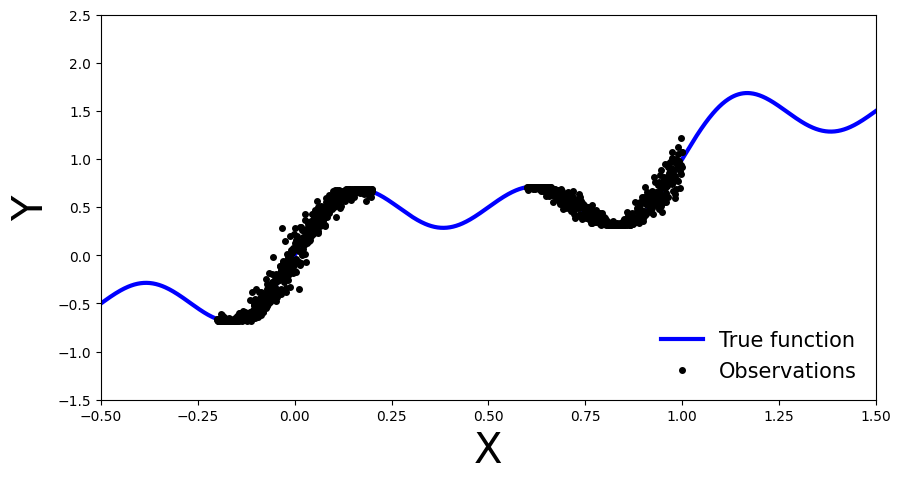

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import trange, tqdm

torch.manual_seed(42)
np.random.seed(42)

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
x_obs = np.hstack([np.linspace(-0.2, 0.2, 500), np.linspace(0.6, 1, 500)])
noise = 0.02 * np.random.randn(x_obs.shape[0])
y_obs = x_obs + 0.3 * np.sin(2 * np.pi * (x_obs + noise)) + 0.3 * np.sin(4 * np.pi * (x_obs + noise)) + noise

x_true = np.linspace(-0.5, 1.5, 1000)
y_true = x_true + 0.3 * np.sin(2 * np.pi * x_true) + 0.3 * np.sin(4 * np.pi * x_true)

# Set plot limits and labels
xlims = [-0.5, 1.5]
ylims = [-1.5, 2.5]

# Create plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_true, y_true, 'b-', linewidth=3, label="True function")
ax.plot(x_obs, y_obs, 'ko', markersize=4, label="Observations")
ax.set_xlim(xlims)
ax.set_ylim(ylims)
ax.set_xlabel("X", fontsize=30)
ax.set_ylabel("Y", fontsize=30)
ax.legend(loc=4, fontsize=15, frameon=False)

plt.show()

## Getting started with Pyro

Let's install Pyro now.  You may have to restart the runtime after this step.

In [2]:
!pip install pyro-ppl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.8/732.8 kB 9.7 MB/s eta 0:00:00


## Bayesian Neural Network with Gaussian Prior and Likelihood
Our first Bayesian neural network employs a Gaussian prior on the weights and a Gaussian likelihood function for the data. The network is a shallow neural network with one hidden layer.

To be specific, we use the following prior on the weights $\theta$:

$p(\theta) = \mathcal{N}(\mathbf{0}, 10\cdot\mathbb{I}),$ where $\mathbb{I}$ is the identity matrix.

To train the network, we define a likelihood function comparing the predicted outputs of the network with the actual data points:

$p(y_i| x_i, \theta) = \mathcal{N}\big(NN_{\theta}(x_i), \sigma^2\big)$, with prior $\sigma \sim \Gamma(1,1)$.

Here, $y_i$ represents the actual output for the $i$-th data point, $x_i$ represents the input for that data point, $\sigma$ is the standard deviation parameter for the normal distribution and $NN_{\theta}$ is the shallow neural network parameterized by $\theta$.

Note that we use $\sigma^2$ instead of $\sigma$ in the likelihood function because we use a Gaussian prior on $\sigma$ when performing variational inference and then want to avoid negative values for the standard deviation.

In [3]:
import pyro
import pyro.distributions as dist
from pyro.nn import PyroModule, PyroSample
import torch.nn as nn


class BNN(PyroModule):
    def __init__(self, in_dim=1, out_dim=1, hid_dim=5, prior_scale=10.):
        super().__init__()

        self.activation = nn.Tanh()  # or nn.ReLU()
        self.layer1 = PyroModule[nn.Linear](in_dim, hid_dim)  # Input to hidden layer
        self.layer2 = PyroModule[nn.Linear](hid_dim, out_dim)  # Hidden to output layer

        # Set layer parameters as random variables
        self.layer1.weight = PyroSample(dist.Normal(0., prior_scale).expand([hid_dim, in_dim]).to_event(2))
        self.layer1.bias = PyroSample(dist.Normal(0., prior_scale).expand([hid_dim]).to_event(1))
        self.layer2.weight = PyroSample(dist.Normal(0., prior_scale).expand([out_dim, hid_dim]).to_event(2))
        self.layer2.bias = PyroSample(dist.Normal(0., prior_scale).expand([out_dim]).to_event(1))

    def forward(self, x, y=None):
        x = x.reshape(-1, 1)
        x = self.activation(self.layer1(x))
        mu = self.layer2(x).squeeze()
        sigma = pyro.sample("sigma", dist.Gamma(.5, 1))  # Infer the response noise

        # Sampling model
        with pyro.plate("data", x.shape[0]):
            obs = pyro.sample("obs", dist.Normal(mu, sigma * sigma), obs=y)
        return mu

## Define and run Markov chain Monte Carlo sampler

To begin with, we can use MCMC to compute an *unbiased estimate* of $p(y|x, \mathcal{D}) = \mathbb{E}_{\theta \sim p(\theta|\mathcal{D})}\big[p(y|x,\theta)\big]$ through Monte Carlo sampling. Specifically, we can approximate $\mathbb{E}_{\theta \sim p(\theta|\mathcal{D})}\big[p(y|x,\theta)\big]$ as follows:
$$\mathbb{E}_{\theta \sim p(\theta|\mathcal{D})}\big[p(y|x,\theta)\big] \approx \frac{1}{N} \sum_{i=1}^{N} p(y|x,\theta_{i}),$$
where $\theta_{i} \sim p(\theta_i|\mathcal{D}) \propto p(\mathcal{D}|\theta)p(\theta)$ are samples drawn from the posterior distribution. Because the normalizing constant is intractable, we require MCMC methods like Hamiltonian Monte Carlo to draw samples from the non-normalized posterior.

Here, we use the No-U-Turn ([NUTS](https://arxiv.org/abs/1111.4246)) kernel.

In [10]:
from pyro.infer import MCMC, NUTS

model = BNN()

# Set Pyro random seed
pyro.set_rng_seed(42)

# Define Hamiltonian Monte Carlo (HMC) kernel
# NUTS = "No-U-Turn Sampler" (https://arxiv.org/abs/1111.4246), gives HMC an adaptive step size
nuts_kernel = NUTS(model, jit_compile=False)  # jit_compile=True is faster but requires PyTorch 1.6+

# Define MCMC sampler, get 50 posterior samples
mcmc = MCMC(nuts_kernel, num_samples=50)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(x_obs).float()
y_train = torch.from_numpy(y_obs).float()

# Run MCMC
mcmc.run(x_train, y_train)

Sample: 100%|██████████| 100/100 [05:51,  3.51s/it, step size=3.40e-04, acc. prob=0.959]


We calculate and plot the predictive distribution.

In [ ]:
from pyro.infer import Predictive

predictive = Predictive(model=model, posterior_samples=mcmc.get_samples())
x_test = torch.linspace(xlims[0], xlims[1], 3000)
preds = predictive(x_test)

In [ ]:
def plot_predictions(preds):
    y_pred = preds['obs'].T.detach().numpy().mean(axis=1)
    y_std = preds['obs'].T.detach().numpy().std(axis=1)

    fig, ax = plt.subplots(figsize=(10, 5))
    xlims = [-0.5, 1.5]
    ylims = [-1.5, 2.5]
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.xlabel("X", fontsize=30)
    plt.ylabel("Y", fontsize=30)

    ax.plot(x_true, y_true, 'b-', linewidth=3, label="true function")
    ax.plot(x_obs, y_obs, 'ko', markersize=4, label="observations")
    ax.plot(x_obs, y_obs, 'ko', markersize=3)
    ax.plot(x_test, y_pred, '-', linewidth=3, color="#408765", label="predictive mean")
    ax.fill_between(x_test, y_pred - 2 * y_std, y_pred + 2 * y_std, alpha=0.6, color='#86cfac', zorder=5)

    plt.legend(loc=4, fontsize=15, frameon=False)

In [ ]:
plot_predictions(preds)

## Exercise 1: Deep Bayesian Neural Network

We can define a deep Bayesian neural network in a similar fashion, with Gaussian priors on the weights:

$p(\theta) = \mathcal{N}(\mathbf{0}, 5\cdot\mathbb{I})$.

The likelihood function is also Gaussian:

$p(y_i| x_i, \theta) = \mathcal{N}\big(NN_{\theta}(x_i), \sigma^2\big)$, with $\sigma \sim \Gamma(0.5,1)$.

> Implement the deep Bayesian neural network and run MCMC to obtain posterior samples.
> Compute and plot the predictive distribution.
> Use the following network architecture: Number of hidden layers: 5, Number of hidden units per layer: 10, Activation function: Tanh, Prior scale: 5.

In [ ]:
class DeepBNN(PyroModule):
    def __init__(self, in_dim=1, out_dim=1, hid_dim=10, n_hid_layers=5, prior_scale=5.):
        super().__init__()

        self.activation = nn.Tanh()  # could also be ReLU or LeakyReLU
        assert in_dim > 0 and out_dim > 0 and hid_dim > 0 and n_hid_layers > 0  # make sure the dimensions are valid

        # Define the layer sizes and the PyroModule layer list
        self.layer_sizes = [in_dim] + n_hid_layers * [hid_dim] + [out_dim]
        layer_list = [PyroModule[nn.Linear](self.layer_sizes[idx - 1], self.layer_sizes[idx]) for idx in
                      range(1, len(self.layer_sizes))]
        self.layers = PyroModule[torch.nn.ModuleList](layer_list)

        for layer_idx, layer in enumerate(self.layers):
            layer.weight = PyroSample(dist.Normal(0., prior_scale * np.sqrt(2 / self.layer_sizes[layer_idx])).expand(
                [self.layer_sizes[layer_idx + 1], self.layer_sizes[layer_idx]]).to_event(2))
            layer.bias = PyroSample(dist.Normal(0., prior_scale).expand([self.layer_sizes[layer_idx + 1]]).to_event(1))

    def forward(self, x, y=None):
        x = x.reshape(-1, 1)
        x = self.activation(self.layers[0](x))  # input --> hidden
        for layer in self.layers[1:-1]:
            x = self.activation(layer(x))  # hidden --> hidden
        mu = self.layers[-1](x).squeeze()  # hidden --> output
        sigma = pyro.sample("sigma", dist.Gamma(.5, 1))  # infer the response noise

        with pyro.plate("data", x.shape[0]):
            obs = pyro.sample("obs", dist.Normal(mu, sigma * sigma), obs=y)
        return mu

### Train the deep BNN with MCMC...

In [ ]:
# define model and data
model = DeepBNNhid_dim=10, n_hid_layers=5, prior_scale=5.)

# define MCMC sampler
nuts_kernel = NUTS(model, jit_compile=False)
mcmc = MCMC(nuts_kernel, num_samples=50)
mcmc.run(x_train, y_train)

Compute predictive distribution...

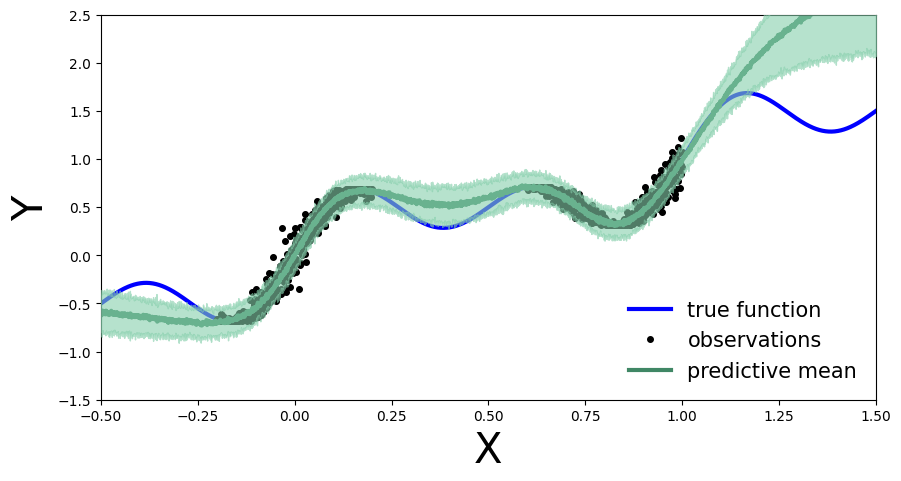

In [11]:
predictive = Predictive(model=model, posterior_samples=mcmc.get_samples())
preds = predictive(x_test)
plot_predictions(preds)

## Train BNNs with mean-field variational inference

We will now move on to variational inference. Since the normalized posterior probability density $p(\theta|\mathcal{D})$ is intractable, we approximate it with a tractable parametrized density $q_{\phi}(\theta)$ in a family of probability densities $\mathcal{Q}$. The variational parameters are denoted by $\phi$ and the variational density is called the "guide" in Pyro. The goal is to find the variational probability density that best approximates the posterior by minimizing the KL divergence $$KL\big(q_{\phi}(\theta)||p(\theta|\mathcal{D})\big)$$ with respect to the variational parameters.
However, directly minimizing the KL divergence is not tractable because we assume that the posterior density is intractable. To solve this, we use Bayes theorem to obtain
$$
\log p(\mathcal{D}|\theta) = KL\big(q_{\phi}(\theta)||p(\theta|\mathcal{D})\big) + ELBO(q_{\phi}(\theta)),
$$
where $ELBO(q_{\phi}(\theta))$ is the *Evidence Lower Bound*, given by
$$
ELBO(q_{\phi}(\theta)) = \mathbb{E}_{\theta \sim q_{\phi}(\theta)}\big[\log p(y|x,\theta) \big] - KL\big(q_{\phi}(\theta) || p(\theta) \big).
$$
By maximizing the ELBO, we indirectly minimize the KL divergence between the variational probability density and the posterior density.

Set up for stochastic variational inference with the variational density $q_{\phi}(\theta)$ by using a normal probability density with a diagonal covariance matrix:

In [13]:
from pyro.infer import SVI, Trace_ELBO
from pyro.infer.autoguide import AutoDiagonalNormal
from tqdm.auto import trange
pyro.clear_param_store()

model = DeepBNN(hid_dim=10, n_hid_layers=5, prior_scale=5.)
mean_field_guide = AutoDiagonalNormal(model)
optimizer = pyro.optim.Adam({"lr": 0.01})

svi = SVI(model, mean_field_guide, optimizer, loss=Trace_ELBO())
pyro.clear_param_store()

num_epochs = 25000
progress_bar = trange(num_epochs)

for epoch in progress_bar:
    loss = svi.step(x_train, y_train)
    progress_bar.set_postfix(loss=f"{loss / x_train.shape[0]:.3f}")

  0%|          | 0/25000 [00:00<?, ?it/s]

As before, we compute the predictive distribution sampling from the trained variational density.

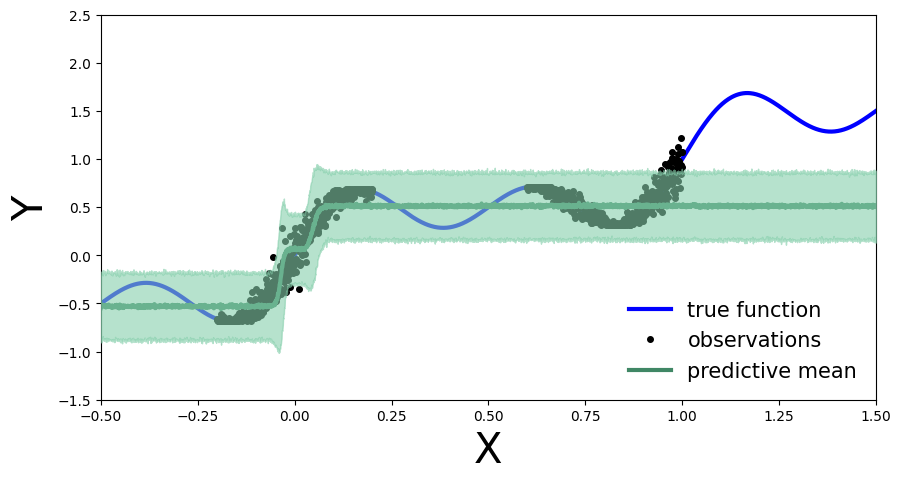

In [14]:
predictive = Predictive(model, guide=mean_field_guide, num_samples=500)
preds = predictive(x_test)
plot_predictions(preds)

## Exercise 2: Bayesian updating with variational inference

What happens if we obtain new data points, denoted as $\mathcal{D}'$, after performing variational inference using the observations $\mathcal{D}$?

<ipython-input-15-68b431b95167>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_new, y_new, 'ko', markersize=4, label="New observations", c="r")


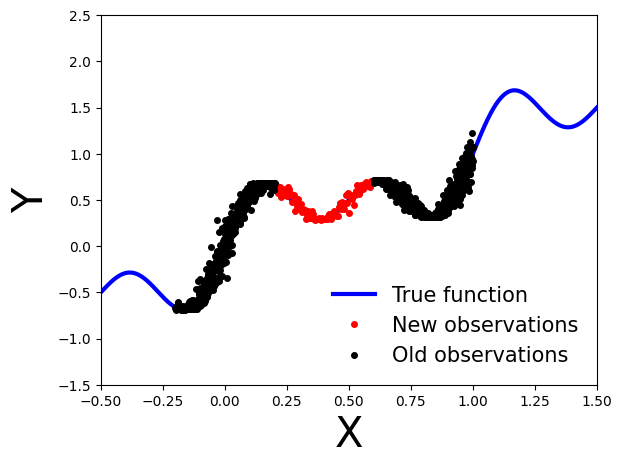

In [15]:
# Generate new observations
x_new = np.linspace(0.2, 0.6, 100)
noise = 0.02 * np.random.randn(x_new.shape[0])
y_new = x_new + 0.3 * np.sin(2 * np.pi * (x_new + noise)) + 0.3 * np.sin(4 * np.pi * (x_new + noise)) + noise

# Generate true function
x_true = np.linspace(-0.5, 1.5, 1000)
y_true = x_true + 0.3 * np.sin(2 * np.pi * x_true) + 0.3 * np.sin(4 * np.pi * x_true)

# Set axis limits and labels
plt.xlim(xlims)
plt.ylim(ylims)
plt.xlabel("X", fontsize=30)
plt.ylabel("Y", fontsize=30)

# Plot all datasets
plt.plot(x_true, y_true, 'b-', linewidth=3, label="True function")
plt.plot(x_new, y_new, 'ko', markersize=4, label="New observations", c="r")
plt.plot(x_obs, y_obs, 'ko', markersize=4, label="Old observations")
plt.legend(loc=4, fontsize=15, frameon=False)
plt.show()

## Bayesian update

How can we perform a Bayesian update on the model using variational inference when new observations become available?

We can use the previously calculated posterior probability density as the new prior and update the posterior with the new observations. Specifically, the updated posterior probability density is given by:

$$
p(\theta|\mathcal{D}') = \frac{p(\mathcal{D}'|\theta)q_{\phi}(\theta)}{\int p(\mathcal{D}'|\theta)q_{\phi}(\theta)}
$$

Note that we want to update our model using only the new observations $\mathcal{D}'$, relying on the fact that the variational density used as our new prior carries the necessary information on the old observations $\mathcal{D}$.


### Implementation in Pyro

To implement this in Pyro, we can extract the variational parameters (mean and standard deviation) from the `guide` and use them to initialize the prior in a new model that is similar to the original model used for variational inference.

From the Gaussian `guide` we can extract the variational parameters (mean and standard deviation) as:

```python
mu = guide.get_posterior().mean
sigma = guide.get_posterior().stddev
```





### Exercise 2.1 Learn a model on the old observations
First, as before, we define a model using Gaussian prior $\mathcal{N}(\mathbf{0}, 10\cdot \mathbb{I})$.

> Train a model `MyFirstBNN` on the old observations $\mathcal{D}$ using variational inference with `AutoDiagonalNormal()` as guide.

In [16]:
from pyro.optim import Adam
pyro.set_rng_seed(42)
pyro.clear_param_store()

model = BNN()
guide = AutoDiagonalNormal(model)
optim = Adam({"lr": 0.03})
svi = pyro.infer.SVI(model, guide, optim, loss=Trace_ELBO())

num_iterations = 10000
progress_bar = trange(num_iterations)

for j in progress_bar:
    loss = svi.step(x_train, y_train)
    progress_bar.set_description("[iteration %04d] loss: %.4f" % (j + 1, loss / len(x_train)))

  0%|          | 0/10000 [00:00<?, ?it/s]

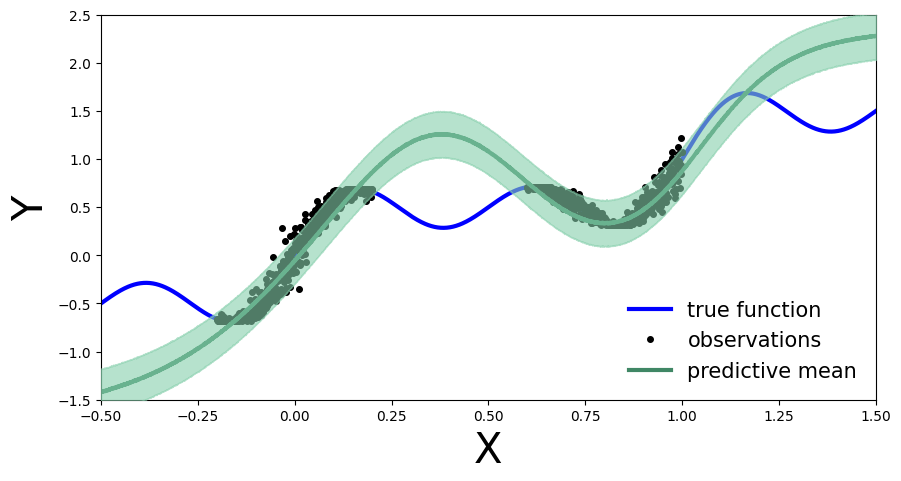

In [17]:
predictive = Predictive(model, guide=guide, num_samples=5000)
preds = predictive(x_test)
plot_predictions(preds)

Next, we can extract the variational parameters (mean and standard deviation) from the `guide` and use them to initialize the prior in a new model that is similar to the original model used for variational inference.

In [18]:
# Extract variational parameters from guide
mu = guide.get_posterior().mean.detach()
stddev = guide.get_posterior().stddev.detach()

In [19]:
for name, value in pyro.get_param_store().items():
    print(name, pyro.param(name))

AutoDiagonalNormal.loc Parameter containing:
tensor([ 4.4191,  2.0755,  2.5203,  2.9757, -2.8465, -4.5504, -0.6823,  8.6778,
         8.4491,  1.4790,  1.2583,  5.1179,  0.9285, -1.8939,  4.3386,  1.2919,
        -1.0739], requires_grad=True)
AutoDiagonalNormal.scale tensor([1.4527e-02, 2.4028e-03, 2.1656e+00, 1.6080e+00, 4.6767e-03, 1.4399e-02,
        1.4626e-03, 1.5948e+00, 8.8790e-01, 2.9017e-03, 6.1736e-03, 9.5347e-03,
        6.3800e-03, 5.4558e-03, 7.9139e-03, 5.9699e-03, 4.8264e-02],
       grad_fn=<SoftplusBackward0>)


### Exercise 2.2 Initialize a second model with the variational parameters
> Define a new model similar to `MyFirstBNN(PyroModule)`, that takes the variational parameters and uses them to initialize the prior.

In [20]:
class UpdatedBNN(PyroModule):
    def __init__(self, mu, stddev, in_dim=1, out_dim=1, hid_dim=5):
        super().__init__()
        self.mu = mu
        self.stddev = stddev

        self.activation = nn.Tanh()
        self.layer1 = PyroModule[nn.Linear](in_dim, hid_dim)
        self.layer2 = PyroModule[nn.Linear](hid_dim, out_dim)

        self.layer1.weight = PyroSample(dist.Normal(self.mu[0:5].unsqueeze(1), self.stddev[0:5].unsqueeze(1)).to_event(2))
        self.layer1.bias = PyroSample(dist.Normal(self.mu[5:10], self.stddev[5:10]).to_event(1))
        self.layer2.weight = PyroSample(dist.Normal(self.mu[10:15].unsqueeze(0), self.stddev[10:15].unsqueeze(0)).to_event(2))
        self.layer2.bias = PyroSample(dist.Normal(self.mu[15:16], self.stddev[15:16]).to_event(1))
        # 17th parameter is parameter sigma from the Gamma distribution

    def forward(self, x, y=None):
        x = x.reshape(-1, 1)
        x = self.activation(self.layer1(x))
        mu = self.layer2(x).squeeze()
        sigma = pyro.sample("sigma", dist.Gamma(.5, 1))

        with pyro.plate("data", x.shape[0]):
            obs = pyro.sample("obs", dist.Normal(mu, sigma * sigma), obs=y)
        return mu

### Exercise 2.3 Perform variational inference on the new model
> Then perform variational inference on this new model using the new observations and plot the predictive distribution.
> What do you observe? How does the predictive distribution compare to the one obtained in Exercise 2.1?

In [21]:
x_train_new = torch.from_numpy(x_new).float()
y_train_new = torch.from_numpy(y_new).float()

pyro.clear_param_store()
new_model = UpdatedBNN(mu, stddev)
new_guide = AutoDiagonalNormal(new_model)
optim = Adam({"lr": 0.01})
svi = pyro.infer.SVI(new_model, new_guide, optim, loss=Trace_ELBO())

num_iterations = 1000
progress_bar = trange(num_iterations)

for j in progress_bar:
    loss = svi.step(x_train_new, y_train_new)
    progress_bar.set_description("[iteration %04d] loss: %.4f" % (j + 1, loss / len(x_train)))


  0%|          | 0/1000 [00:00<?, ?it/s]

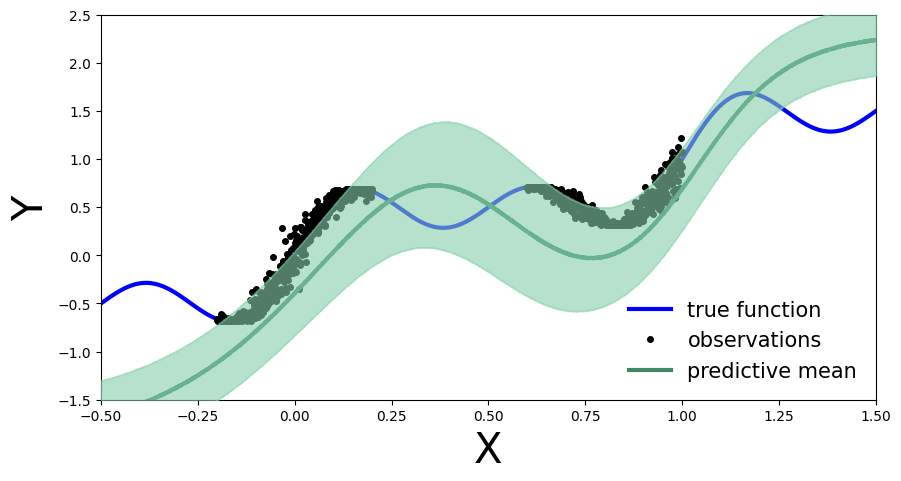

In [22]:
predictive = Predictive(new_model, guide=new_guide, num_samples=5000)
preds = predictive(x_test)
plot_predictions(preds)

## Evaluate other NNs

In [27]:
def get_simple_data_train():
    x = np.linspace(-.2, 0.2, 500)
    x = np.hstack([x, np.linspace(.6, 1, 500)])
    eps = 0.02 * np.random.randn(x.shape[0])
    y = x + 0.3 * np.sin(2 * np.pi * (x + eps)) + 0.3 * np.sin(4 * np.pi * (x + eps)) + eps
    x_train = torch.from_numpy(x).float()[:, None]
    y_train = torch.from_numpy(y).float()
    return x_train, y_train

In [28]:
def plot_generic(add_to_plot=None):
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.xlim([-.5, 1.5])
    plt.ylim([-1.5, 2.5])
    plt.xlabel("X", fontsize=30)
    plt.ylabel("Y", fontsize=30)

    x_train, y_train = get_simple_data_train()

    x_true = np.linspace(-.5, 1.5, 1000)
    y_true = x_true + 0.3 * np.sin(2 * np.pi * x_true) + 0.3 * np.sin(4 * np.pi * x_true)

    ax.plot(x_train, y_train, 'ko', markersize=4, label="observations")
    ax.plot(x_true, y_true, 'b-', linewidth=3, label="true function")
    if add_to_plot is not None:
        add_to_plot(ax)

    plt.legend(loc=4, fontsize=15, frameon=False)
    plt.show()

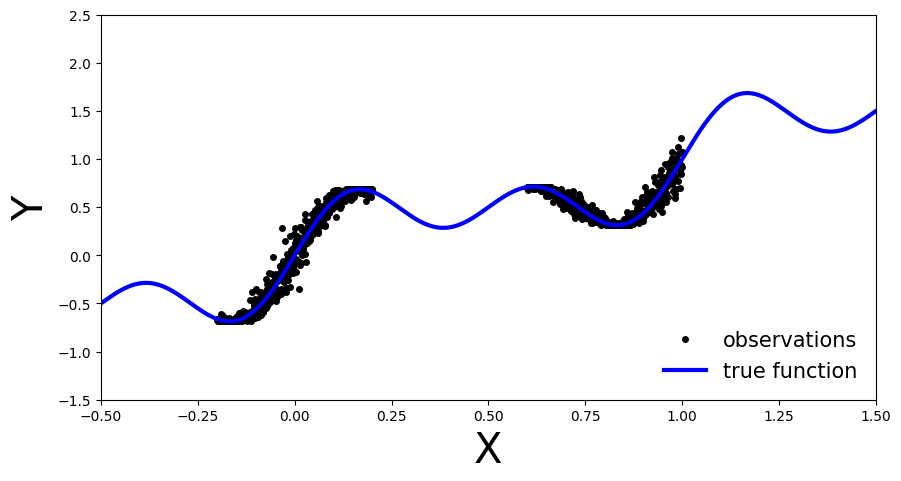

In [29]:
plot_generic()

### Define non-Bayesian Neural Network

First let's create our point estimate neural network, in other words a standard fully connected MLP. We will define the number of hidden layers dynamically so we can reuse the same class for different depths.  We will also add a *dropout* flag, this will allow us to easily use the same architecture for our BNN.

In [30]:
class MLP(nn.Module):
    def __init__(self, input_dim=1, output_dim=1, hidden_dim=10, n_hidden_layers=1, use_dropout=False):
        super().__init__()

        self.use_dropout = use_dropout
        if use_dropout:
            self.dropout = nn.Dropout(p=0.5)
        self.activation = nn.Tanh()

        # dynamically define architecture
        self.layer_sizes = [input_dim] + n_hidden_layers * [hidden_dim] + [output_dim]
        layer_list = [nn.Linear(self.layer_sizes[idx - 1], self.layer_sizes[idx]) for idx in
                      range(1, len(self.layer_sizes))]
        self.layers = nn.ModuleList(layer_list)

    def forward(self, input):
        hidden = self.activation(self.layers[0](input))
        for layer in self.layers[1:-1]:
            hidden_temp = self.activation(layer(hidden))

            if self.use_dropout:
                hidden_temp = self.dropout(hidden_temp)

            hidden = hidden_temp + hidden  # residual connection

        output_mean = self.layers[-1](hidden).squeeze()
        return output_mean

### Train one deterministic NN

**Training**

Now let's train our MLP with the training data we generated above:

In [31]:
def train(net, train_data):
    x_train, y_train = train_data
    optimizer = torch.optim.Adam(params=net.parameters(), lr=1e-3)
    criterion = nn.MSELoss()

    progress_bar = trange(3000)
    for _ in progress_bar:
        optimizer.zero_grad()
        loss = criterion(y_train, net(x_train))
        progress_bar.set_postfix(loss=f'{loss / x_train.shape[0]:.3f}')
        loss.backward()
        optimizer.step()
    return net

In [32]:
train_data = get_simple_data_train()
x_test = torch.linspace(-.5, 1.5, 3000)[:, None]  # test over the whole range

net = MLP(hidden_dim=30, n_hidden_layers=2)
net = train(net, train_data)
y_preds = net(x_test).clone().detach().numpy()

  0%|          | 0/3000 [00:00<?, ?it/s]

**Evaluate**

Let's investigate how our deterministic MLP generalizes over the entire domain of our input variable $x$ (the model was only trained on the observations, now we will also pass in data outside this region)

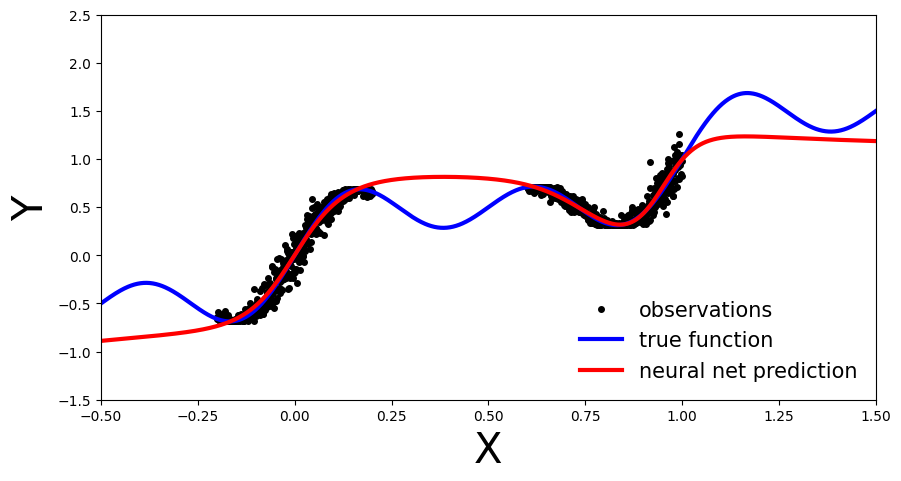

In [33]:
def plot_predictions(x_test, y_preds):
    def add_predictions(ax):
        ax.plot(x_test, y_preds, 'r-', linewidth=3, label='neural net prediction')

    plot_generic(add_predictions)
plot_predictions(x_test, y_preds)

We can see that our deterministic MLP (red line) has correctly learned the data distribution in the training regions, however, as the model has not learned the underlying sinusoidal wave function, it's predictions outside the training region are inaccurate. As our MLP is a point estimate NN we have no measure confidence in the predictions outside the training region. In the upcoming sections let's see how this compares to BNN.

## Deep Ensemble

Deep ensembles were first introduced by [Lakshminarayanan et al. (2017)](https://arxiv.org/abs/1612.01474). As the name implies multiple point estimate NN are trained, *an ensemble*, and the final prediction is computed as an average across the models. From a Bayesian perspective the different point estimates correspond to modes of a Bayesian posterior. This can be interpreted as approximating the posterior with a distribution parametrized as multiple Dirac deltas:

$$
q_{\phi}(\theta | D) = \sum_{\theta_{i} ∈ ϕ} \alpha_{\theta_{i}} δ_{\theta_{i}}(\theta)
$$
where $\alpha_{\theta_{i}}$ are positive constants such that their sum is equal to one.

**Training**

We will reuse the MLP architecture introduced before, simply now we will train an ensemble of such models

In [34]:
ensemble_size = 5
ensemble = [MLP(hidden_dim=30, n_hidden_layers=2) for _ in range(ensemble_size)]
for net in ensemble:
    train(net, train_data)

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

**Evaluate**

Same as before, let's investigate how our Deep Ensemble performs on the entire data domain of our input variable $x$.

In [35]:
y_preds = [np.array(net(x_test).clone().detach().numpy()) for net in ensemble]

Plot each ensemble member's predictive function.

In [36]:
def plot_multiple_predictions(x_test, y_preds):
    def add_multiple_predictions(ax):
        for idx in range(len(y_preds)):
            ax.plot(x_test, y_preds[idx], '-', linewidth=3)

    plot_generic(add_multiple_predictions)

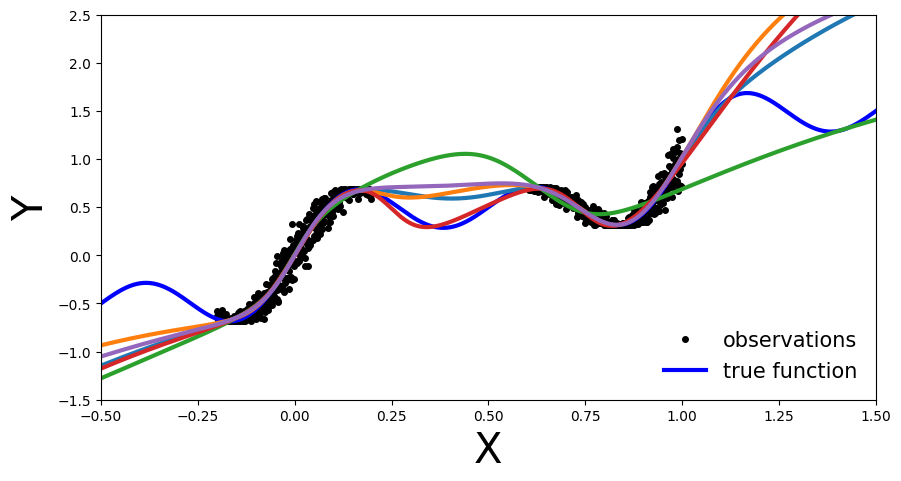

In [37]:
plot_multiple_predictions(x_test, y_preds)

In this plot the benefit of an ensemble approach is not immediately clear. Still on the regions outside the training data each of the trained NN is inaccurate. So what is the benefit you might ask.

Well let's plot the above in a slightly different way: let's visualize the ensemble's **uncertainty bands**.
> From a Bayesian perspective we want to quantify the model's uncertainty on its prediction. This is done via the marginal $p(y|x, D)$, which can be computed as:

$$
p(y|x, D) = \int_{\theta}p(y|x,\theta')p(\theta'|D)d\theta'
$$

> In practice, for Deep Ensembles we approximate the above by computing the mean and standard deviation across the ensemble. Meaning $p(\theta|D)$ represents the parameters of one of the trained models, $\theta_{i} ∼ p(\theta|D)$, which we then use to compute $y_{i} = f(x,\theta_{i})$, representing $p(y|x,\theta')$.


In [38]:
def plot_uncertainty_bands(x_test, y_preds):
    y_preds = np.array(y_preds)
    y_mean = y_preds.mean(axis=0)
    y_std = y_preds.std(axis=0)

    def add_uncertainty(ax):
        ax.plot(x_test, y_mean, '-', linewidth=3, color="#408765", label="predictive mean")
        ax.fill_between(x_test.ravel(), y_mean - 2 * y_std, y_mean + 2 * y_std, alpha=0.6, color='#86cfac', zorder=5)

    plot_generic(add_uncertainty)

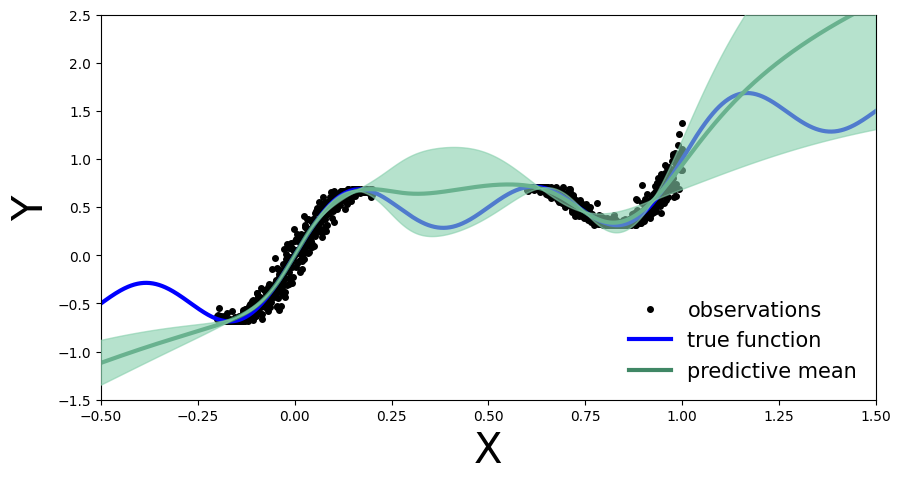

In [39]:
plot_uncertainty_bands(x_test, y_preds)

Now we see the benefit of a Bayesian approach. Outside the training region we not only have the point estimate, but also model's uncertainty about its prediction.

## Monte Carlo Dropout

First we create our MC-Dropout Network. As you can see in the code below, creating a dropout network is extremely simple:
We can reuse our existing network architecture, the only alteration is that during the forward pass we randomly *switch off* (zero) some of the elements of the input tensor.

The Bayesian interpretation of MC-Dropout is that we can see each dropout configuration as a different sample from the approximate posterior distribution $\theta_{i} ∼ q(\theta|D)$.

**Training**

In [40]:
net_dropout = MLP(hidden_dim=30, n_hidden_layers=2, use_dropout=True)
net_dropout = train(net_dropout, train_data)

  0%|          | 0/3000 [00:00<?, ?it/s]

**Evaluate**

Similarly to Deep Ensembles, we pass the test data multiple times through the MC-Dropout network. We do so to obtain $y_{i}$ at the different parameter settings, $\theta_{i}$ of the network, $y_{i}=f(x,\theta_{i})$, governed by the dropout mask.

>This is the main difference compared to dropout implementation in a deterministic NN where it serves as a regularization term. In normal dropout application during test time the dropout is **not** applied. Meaning that all connections are present, but the weights are [adjusted](https://cs231n.github.io/neural-networks-2/)

In [41]:
n_dropout_samples = 100

# compute predictions, resampling dropout mask for each forward pass
y_preds = [net_dropout(x_test).clone().detach().numpy() for _ in range(n_dropout_samples)]
y_preds = np.array(y_preds)

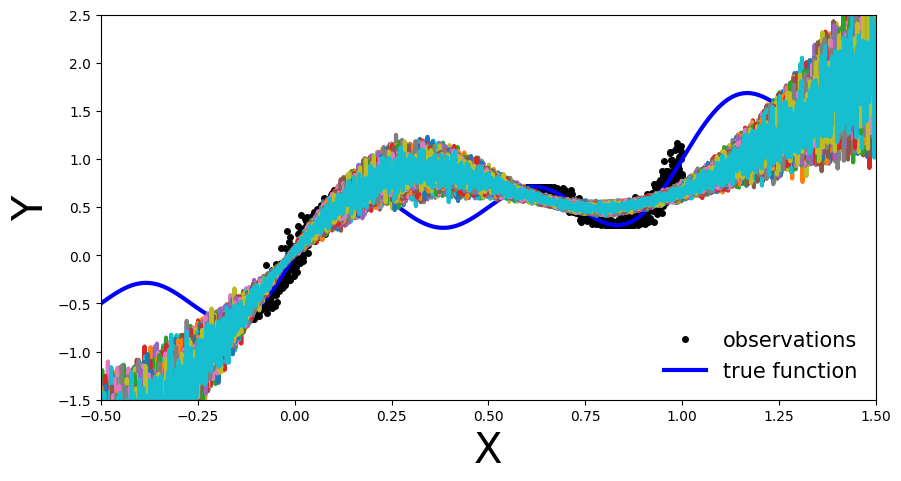

In [42]:
plot_multiple_predictions(x_test, y_preds)

In the above plot each colored line (apart from blue) represents a different parametrization, $\theta_{i}$, of our MC-Dropout Network.

Likewise to the Deep Ensemble Network, we can also compute the MC-dropout's **uncertainty bands**.

> The approach in practice is the same as before: we compute the mean and standard deviation across each dropout mask, which corresponds to the marginal estimation we discussed earlier.

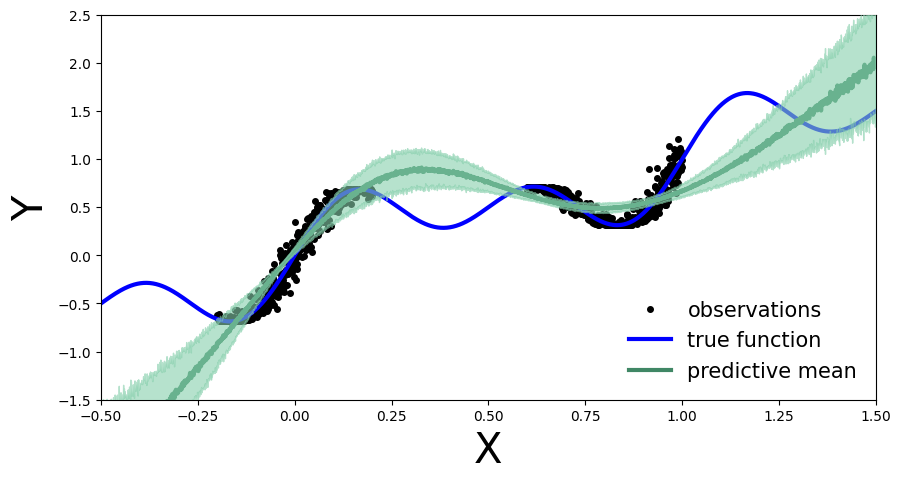

In [43]:
plot_uncertainty_bands(x_test, y_preds)

In the same way as Deep Ensembles, MC-Dropout allows us to have an uncertainty estimate next to our point wise predictions. However, for the given use-case this has come with the cost of an overall drop in the model's performance on the training regions. We observe this because at every pass through our network we randomly choose which nodes to keep, so one could argue that we hinder the networks optimal performance.